In [8]:
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [9]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [10]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

'''
When using a convolutional layer as the first layer to our model,
 we need to reshape our data to (n_images, x_shape, y_shape, channels).
  All you really need to know is that you should set channels to 1 for grayscale images
   and set channels to 3 when you have a set of RGB-images as input.
'''

'\nWhen using a convolutional layer as the first layer to our model,\n we need to reshape our data to (n_images, x_shape, y_shape, channels).\n  All you really need to know is that you should set channels to 1 for grayscale images\n   and set channels to 3 when you have a set of RGB-images as input.\n'

In [11]:
train_X.shape

(60000, 28, 28, 1)

In [12]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [13]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [14]:
model = Sequential()
model.add(Conv2D(128, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=['accuracy'])

In [15]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=4)

Epoch 1/4
938/938 [==============================] - 10s 7ms/step - loss: 0.4615 - accuracy: 0.8326
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 0.3087 - accuracy: 0.8878
Epoch 3/4
938/938 [==============================] - 6s 7ms/step - loss: 0.2688 - accuracy: 0.9018
Epoch 4/4
938/938 [==============================] - 6s 7ms/step - loss: 0.2431 - accuracy: 0.9110


In [16]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2840 - accuracy: 0.8933
Test loss 0.2839701175689697
Test accuracy 0.8932999968528748


313/313 [==============================] - 1s 2ms/step
5
Footwear


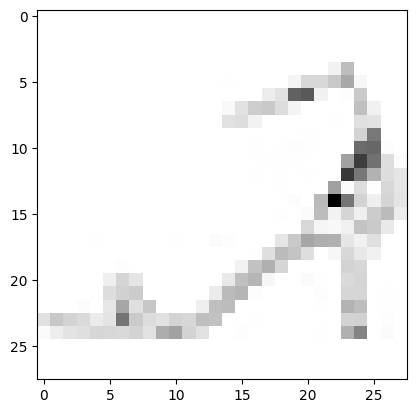

In [17]:
predictions = model.predict(test_X)
list = {0 : 'Sweater',
        1 : 'Pant',
        2 : 'T-shirt',
        3 : 'Dress',
        4 : 'Shirt',
        5 : 'Footwear',
        6 : 'Jacket',
        7 : 'Sneaker',
        8 : 'Purse',
        9 : 'Boots'}
# for i in range (0, 314):
#         print(np.argmax(np.round(predictions[i])), end=" ")
i = 1
ind = np.argmax(np.round(predictions[i]))
print(ind)
print(list[ind])
plt.imshow(test_X[i].reshape(28, 28), cmap = plt.cm.binary)
plt.show()